In [1]:
from aocd import get_data, submit
# from aocd.get import current_day

from IPython.display import display
from IPython.core.display import Markdown

import math
import numpy as np
import re
import sys

In [2]:
DAY = 18
YEAR = 2023

In [3]:
url = f"https://adventofcode.com/{YEAR}/day/{DAY}"
display(Markdown(f"#### See [{YEAR} Day {DAY}]({url})."))

#### See [2023 Day 18](https://adventofcode.com/2023/day/18).

In [4]:
data = get_data(year=YEAR, day=DAY)

In [5]:
data.splitlines()[:5]

['R 7 (#43c232)',
 'U 6 (#1f0fa3)',
 'R 7 (#18f980)',
 'D 3 (#1c5a83)',
 'R 13 (#2a4010)']

In [6]:
data.splitlines()[-5:]

['U 7 (#566e43)',
 'R 3 (#449342)',
 'U 10 (#313cc3)',
 'L 10 (#1e28f2)',
 'U 9 (#09d973)']

# Part A

In [7]:
# data = """R 6 (#70c710)
# D 5 (#0dc571)
# L 2 (#5713f0)
# D 2 (#d2c081)
# R 2 (#59c680)
# D 2 (#411b91)
# L 5 (#8ceee2)
# U 2 (#caa173)
# L 1 (#1b58a2)
# U 2 (#caa171)
# R 2 (#7807d2)
# U 3 (#a77fa3)
# L 2 (#015232)
# U 2 (#7a21e3)
# """

In [8]:
rights = set([('U','R'),('R','D'),('D','L'),('L','U')])

current = (0,0)
vertices = [current]

last_dir,_,_ = data.splitlines()[-1].split()

perimeter = 0
for i, l in enumerate(data.splitlines()):
    dir, dist, color = l.split()
    last_dir,_,_ = data.splitlines()[(i-1) % len(data.splitlines())].split()
    next_dir,_,_ = data.splitlines()[(i+1) % len(data.splitlines())].split()
    if (last_dir, dir) in rights and (dir, next_dir) in rights:  
        dist = int(dist) + 1
    elif (last_dir, dir) not in rights and (dir, next_dir) not in rights:  
        dist = int(dist) - 1
    else:
        dist = int(dist)
    perimeter += dist
    match dir:
        case 'U':
            next = (current[0]-dist, current[1])
        case 'D':
            next = (current[0]+dist, current[1])
        case 'L':
            next = (current[0], current[1]-dist)
        case 'R':
            next = (current[0], current[1]+dist)
    vertices.append(next)
    current = next
    last_dir = dir

In [9]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
x = [p[0] for p in vertices]
y = [p[1] for p in vertices]

ans = PolyArea(x,y)
ans

108909.0

In [11]:
# submit(ans, year=YEAR, day=DAY)

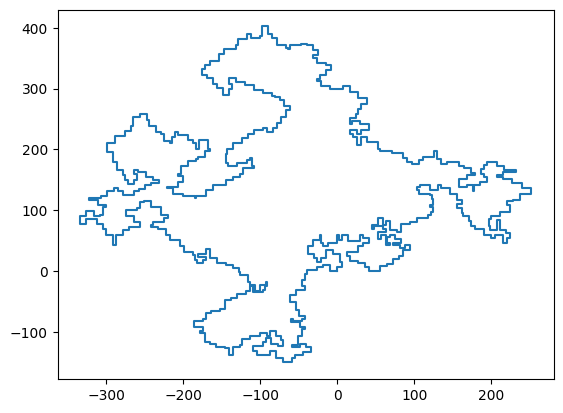

In [12]:
import matplotlib.pyplot as plt
plt.plot([-i for i in x],y)

# Part B

In [13]:
def parse_line(l):
    _,_,hex = l.split()
    hex = re.findall("[a-zA-Z0-9]+", hex)[0]
    dir = dirmap[hex[-1]]
    dist = int(hex[:5], 16)
    return (dir,dist)

In [14]:
rights = set([('U','R'),('R','D'),('D','L'),('L','U')])

current = (0,0)
vertices = [current]

dirmap = {'0':'R','1':'D','2':'L','3':'U',}

perimeter = 0
for i, l in enumerate(data.splitlines()):
    dir, dist = parse_line(l)
    
    last_dir,_ = parse_line(data.splitlines()[(i-1) % len(data.splitlines())])
    next_dir,_ = parse_line(data.splitlines()[(i+1) % len(data.splitlines())])
    if (last_dir, dir) in rights and (dir, next_dir) in rights:  
        dist = int(dist) + 1
    elif (last_dir, dir) not in rights and (dir, next_dir) not in rights:  
        dist = int(dist) - 1
    else:
        dist = int(dist)
    perimeter += dist
    match dir:
        case 'U':
            next = (current[0]-dist, current[1])
        case 'D':
            next = (current[0]+dist, current[1])
        case 'L':
            next = (current[0], current[1]-dist)
        case 'R':
            next = (current[0], current[1]+dist)
    vertices.append(next)
    current = next
    last_dir = dir

In [15]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
x = [p[0] for p in vertices]
y = [p[1] for p in vertices]

ans = PolyArea(x,y)
ans

133125706867777.0

In [16]:
# submit(ans, year=YEAR, day=DAY)

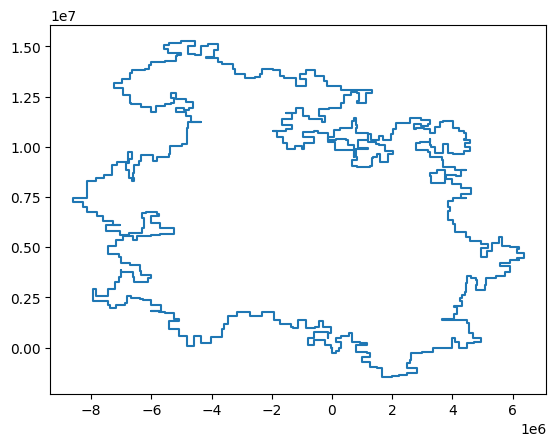

In [17]:
import matplotlib.pyplot as plt
plt.plot([-i for i in x],y)